# Initialisation des packages et chargement du jeu de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

In [2]:
dir_file = 'C:/Users/paul.bonte/Formation OC/P7_Bonte_Paul/data/'

test = pd.read_csv(dir_file + 'application_test.csv')
train = pd.read_csv(dir_file + 'application_train.csv')
bureau = pd.read_csv(dir_file + 'bureau.csv')
bureau_balance = pd.read_csv(dir_file + 'bureau_balance.csv')
cc = pd.read_csv(dir_file + 'credit_card_balance.csv')
instal_paiement = pd.read_csv(dir_file + 'installments_payments.csv')
POS_cash = pd.read_csv(dir_file + 'POS_CASH_balance.csv')

In [3]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [5]:
print(bureau.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


In [6]:
print(bureau_balance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


In [7]:
print(cc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [8]:
print(instal_paiement.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


In [9]:
print(POS_cash.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


# Feature engineering

## Variable de regroupement

In [10]:
print("train data: %s rows and %s cols"%train.shape)
print("Credit Card Balance: %s rows and %s cols"%cc.shape)
print("Bureau: %s rows and %s cols"%bureau.shape)
print("Installments Payments: %s rows and %s cols"%instal_paiement.shape)
print("POS_cash: %s rows and %s cols"%POS_cash.shape)

train data: 307511 rows and 122 cols
Credit Card Balance: 3840312 rows and 23 cols
Bureau: 1716428 rows and 17 cols
Installments Payments: 13605401 rows and 8 cols
POS_cash: 10001358 rows and 8 cols


In [11]:
print(train.SK_ID_CURR.nunique())
print(cc.SK_ID_CURR.nunique())
print(bureau.SK_ID_CURR.nunique())
print(instal_paiement.SK_ID_CURR.nunique())
print(POS_cash.SK_ID_CURR.nunique())

307511
103558
305811
339587
337252


## Création des features

In [12]:
# Dépenses du mois avant crédit / limite de retrait mensuel : Reste t il de l'argent dispo 
cc['AMT_DRAWINGS_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_DRAWINGS_CURRENT,cc.AMT_CREDIT_LIMIT_ACTUAL)]
# retrait cash du mois avant crédit / limite de retrait mensuel
cc['AMT_DRAWINGS_ATM_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_DRAWINGS_ATM_CURRENT,cc.AMT_CREDIT_LIMIT_ACTUAL)]
# Autres retrait mois avant crédit /  limite de retrait mensuel
cc['AMT_DRAWINGS_OTHER_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_DRAWINGS_OTHER_CURRENT,cc.AMT_CREDIT_LIMIT_ACTUAL)]
# Montant tiré ou acheté des biens au cours du mois du crédit précédent /  limite de retrait mensuel
cc['AMT_DRAWINGS_POS_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_DRAWINGS_POS_CURRENT,cc.AMT_CREDIT_LIMIT_ACTUAL)]
# Montant restant sur le crédit précédent / Montant à recevoir sur le crédit précédent
cc['AMT_PRINCIPAL_RECEIVABLE_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_RECEIVABLE_PRINCIPAL,cc.AMT_RECIVABLE)]

# On récupère la moyenne des principaux indicateurs du doc cc : balance carte bleue, retraits, ...
cc_use = cc.groupby(['SK_ID_CURR'],as_index=False).agg({'AMT_BALANCE': np.mean,
                                                        'AMT_DRAWINGS_PCT':np.mean,
                                                        'AMT_DRAWINGS_ATM_PCT':np.mean,
                                                        'AMT_DRAWINGS_OTHER_PCT':np.mean,
                                                        'AMT_DRAWINGS_POS_PCT':np.mean,
                                                        'AMT_PRINCIPAL_RECEIVABLE_PCT':np.mean,
                                                        'CNT_DRAWINGS_ATM_CURRENT':np.mean,
                                                        'CNT_DRAWINGS_CURRENT':np.mean,
                                                        'CNT_DRAWINGS_OTHER_CURRENT':np.mean,
                                                        'CNT_DRAWINGS_POS_CURRENT':np.mean,
                                                        'SK_DPD':np.mean,
                                                        'SK_DPD_DEF':np.mean})
# Date échéance prévu - date de paiement : retard ?
instal_paiement['DAYS_INSTALMENT_DIFF'] = instal_paiement['DAYS_INSTALMENT'] - instal_paiement['DAYS_ENTRY_PAYMENT']
# Ce que le client a réellement payé sur le crédit précédent / ce qui aurait du l'etre
instal_paiement['AMT_PATMENT_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(instal_paiement.AMT_PAYMENT,instal_paiement.AMT_INSTALMENT)]
# On récupère la moyenne des principaux indicateurs du doc 
pmts_use = instal_paiement.groupby(['SK_ID_CURR'],as_index=False).agg({'DAYS_INSTALMENT_DIFF':np.mean,
                                                            'AMT_PATMENT_PCT':np.mean})   

## Merge et récupération du Df final

In [13]:
# Merge Credit Card Balance & Installment Payments
train = train.merge(cc_use,on='SK_ID_CURR',how='left')
train = train.merge(pmts_use,on='SK_ID_CURR',how='left')
print(train.shape)

(307511, 136)


# EDA

## Exploration des données

In [14]:
train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       AMT_DRAWINGS_POS_PCT  AMT_PRINCIPAL_RECEIVABLE_PCT  \
count          60383.000000                  59775.000000   
mean               0.041480                      0.863346   
std                0.094462                      0.246759   
min                0.000000                    -11.151542   
25%                0.000000                      0.832939   
50%                0.002105                      0.958271   
75%                0.039607                      0.975594   
max                2.738914                     30.200277   

       CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count              61140.000000          86905.000000   
mean                   0.566241              1.541650   
std                    0.880410              3.693164   
min                    0.000000              0.000000   
25%                    0.062993              0.000000   
50%                    0.270833              0.216216   
75%                    0.731343              1.324324   
max                   35.000000            118.250000   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT        SK_DPD  \
count                61140.000000              61140.000000  86905.000000   
mean                     0.007255                  1.750056      4.209093   
std                      0.047259                  4.274905     44.602274   
min                      0.000000                  0.000000      0.000000   
25%                      0.000000                  0.000000      0.000000   
50%                      0.000000                  0.045455      0.000000   
75%                      0.000000                  1.428571      0.000000   
max                      2.000000                118.250000   1386.947917   

         SK_DPD_DEF  DAYS_INSTALMENT_DIFF  AMT_PATMENT_PCT  
count  86905.000000         291635.000000    291632.000000  
mean       0.126870             11.201740         1.382975  
std       10.034009             13.149489        30.178966  
min        0.000000          -1884.204545         0.333333  
25%        0.000000              5.854545         0.953846  
50%        0.000000              9.541667         1.000000  
75%        0.000000            

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>],
       [<AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLA

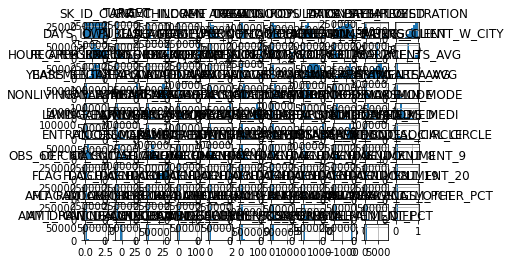

In [15]:
sns.set(rc={'figure.figsize':(4,8)})
train.hist()

object column NAME_CONTRACT_TYPE have 2 unique values
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
-------------
object column CODE_GENDER have 3 unique values
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
-------------
object column FLAG_OWN_CAR have 2 unique values
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
-------------
object column FLAG_OWN_REALTY have 2 unique values
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
-------------
object column NAME_TYPE_SUITE have 7 unique values
object column NAME_INCOME_TYPE have 8 unique values
object column NAME_EDUCATION_TYPE have 5 unique values
object column NAME_FAMILY_STATUS have 6 unique values
object column NAME_HOUSING_TYPE have 6 unique values
object column OCCUPATION_TYPE have 18 unique values
object column WEEKDAY_APPR_PROCESS_START have 7 unique values
object column ORGANIZATION_TYPE have 58 unique values
object column FONDKAPREMONT_M

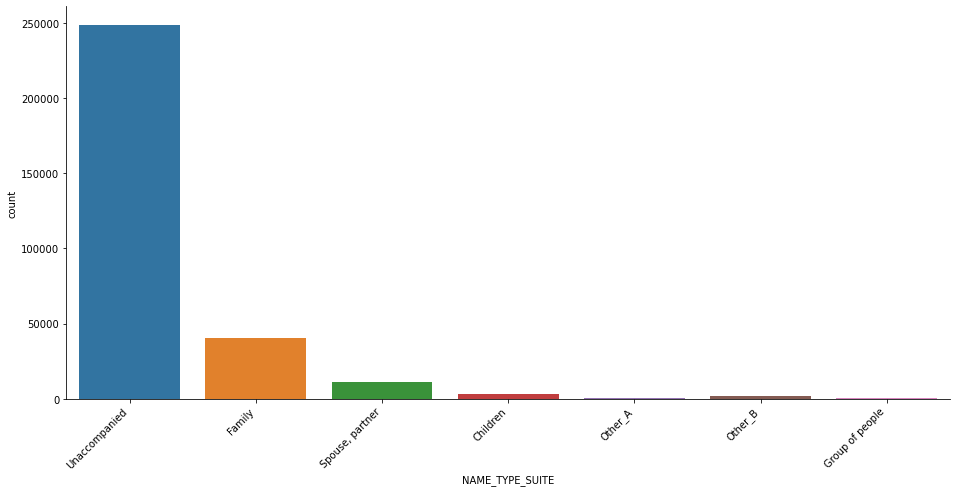

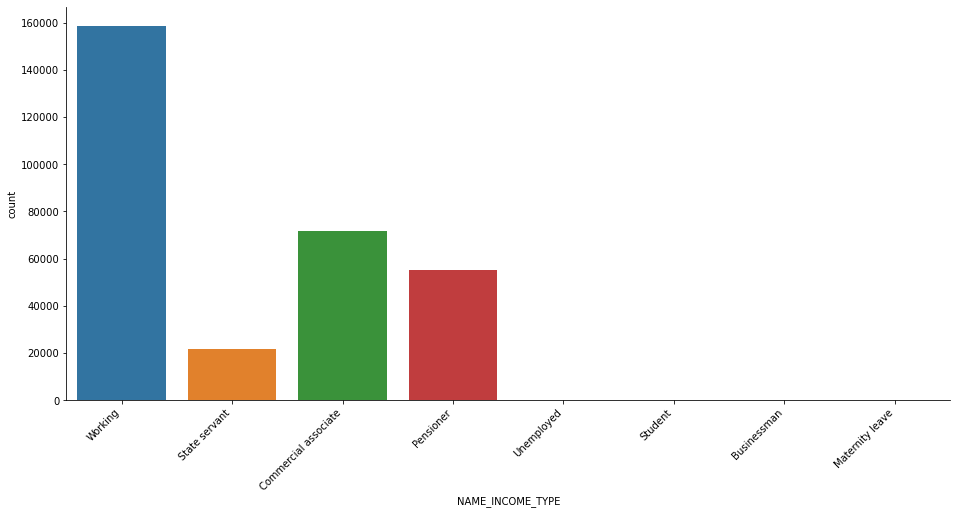

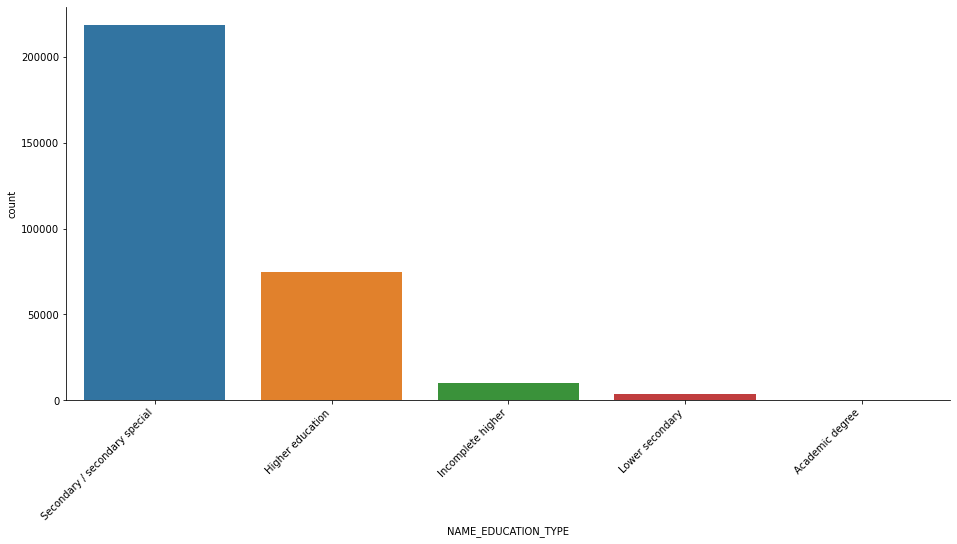

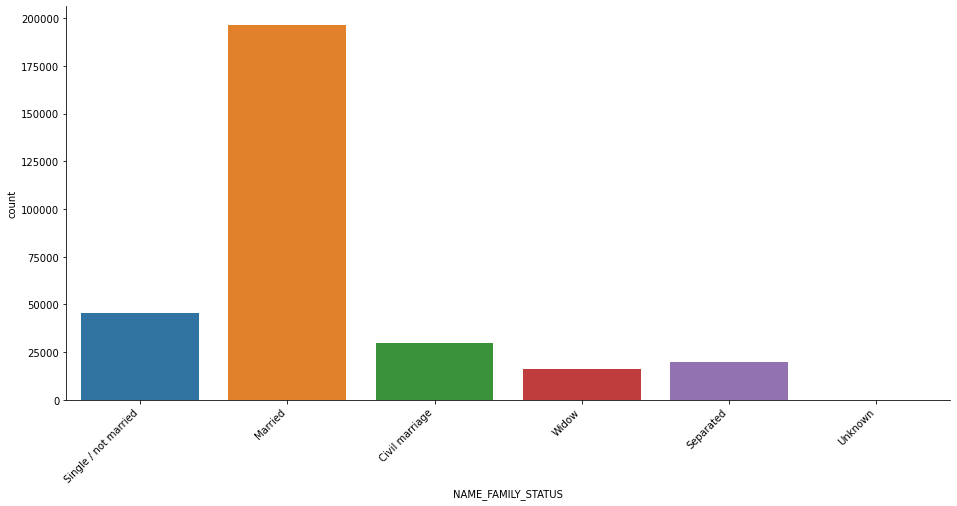

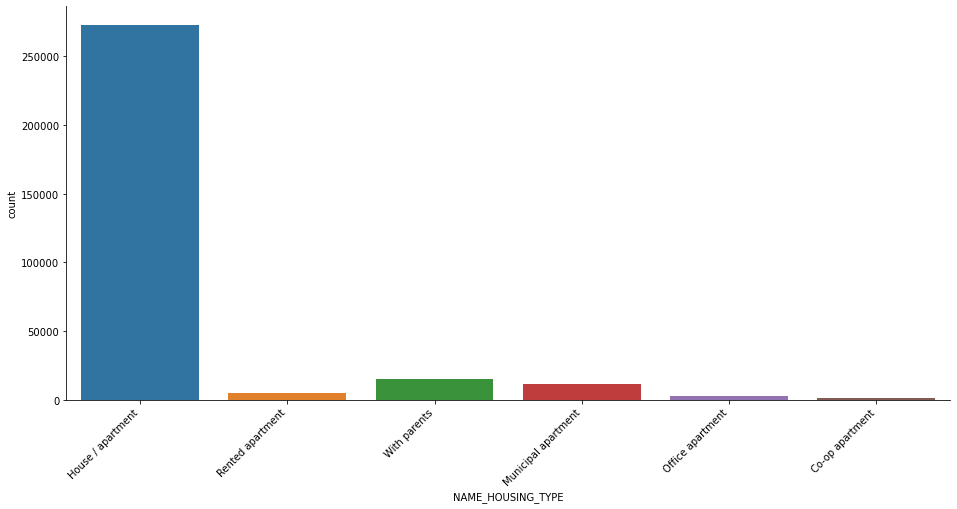

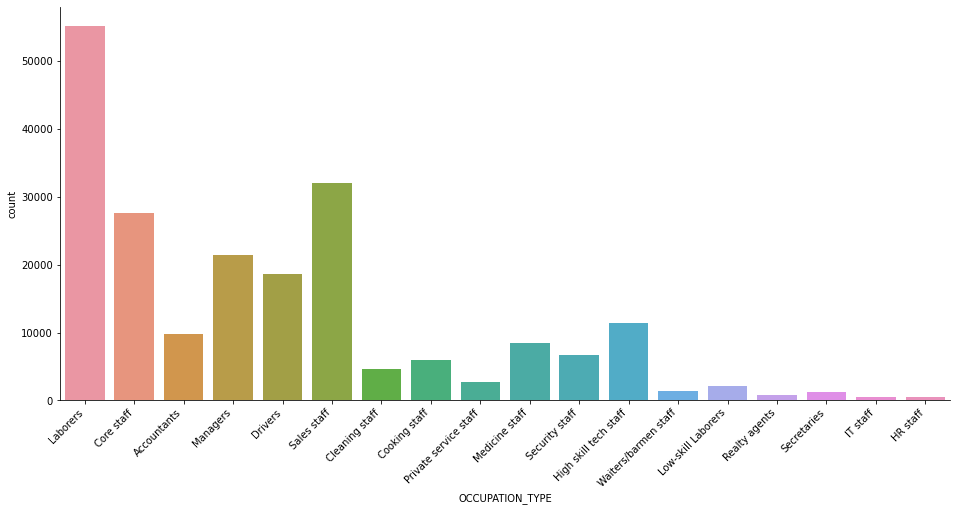

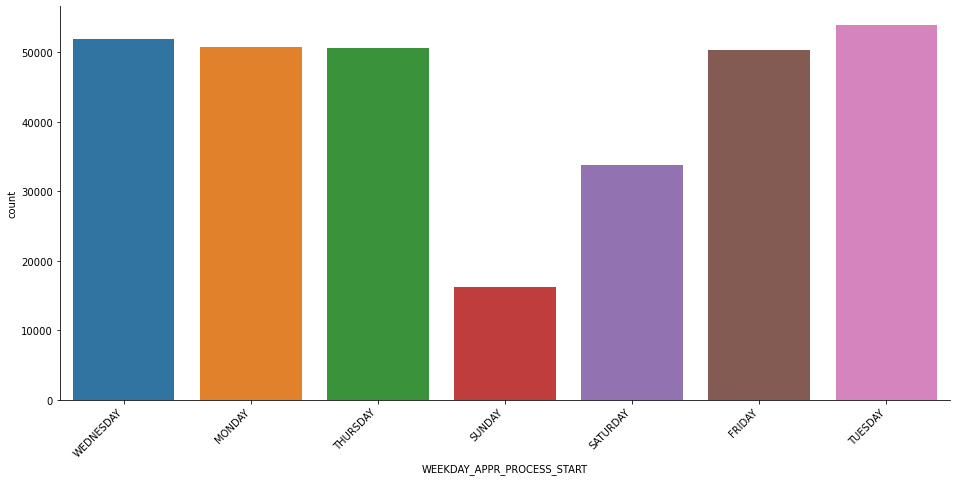

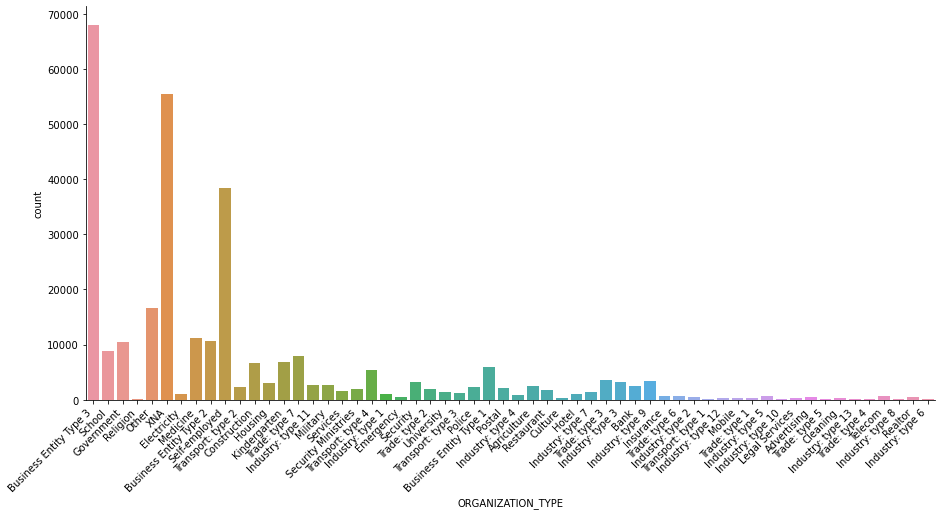

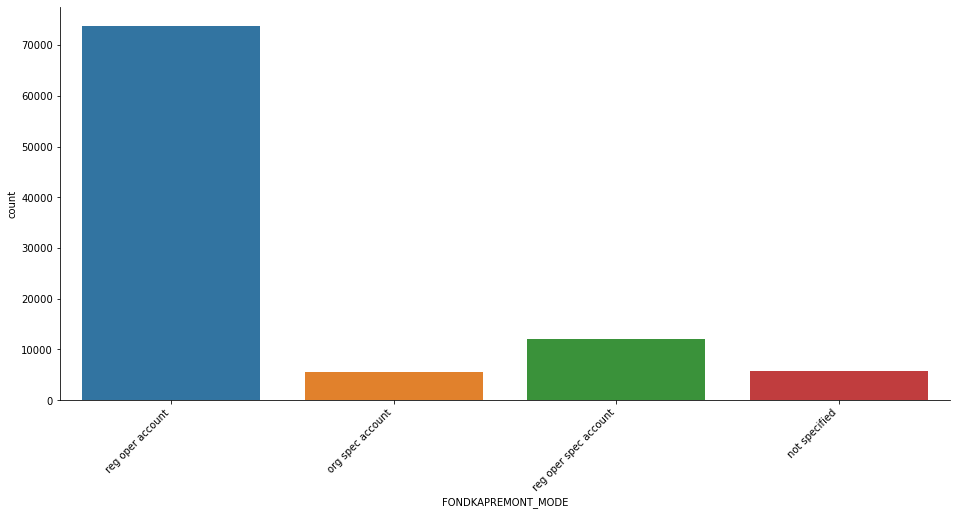

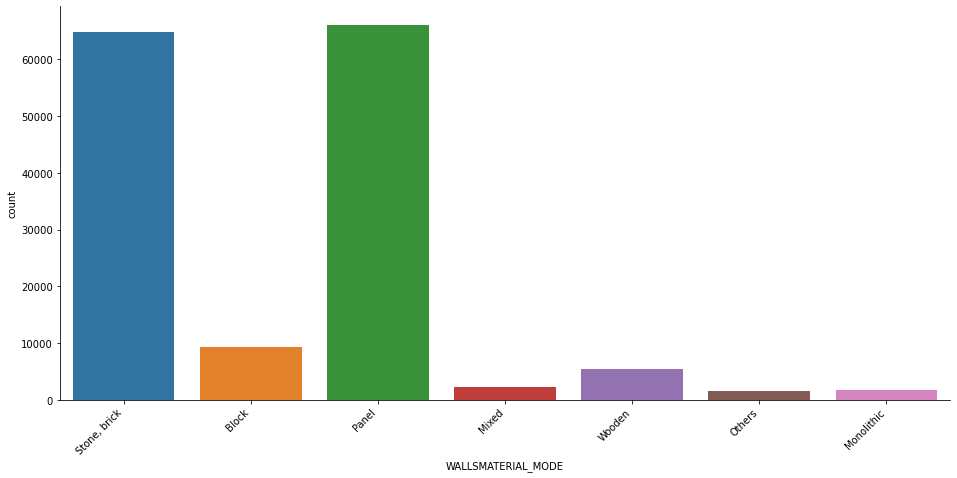

In [16]:
for col in train.columns:
    if train[col].dtype == 'object':
        print("object column %s have %s unique values"%(str(col),train[col].nunique()))
        if train[col].nunique() <= 3:
            print(train[col].value_counts(dropna = False))
            print('-------------')
        else:
            ax = sns.catplot(x=col, kind="count", data=train,height=6, aspect=2.2)
            for axes in ax.axes.flat:
                axes.set_xticklabels(axes.get_xticklabels(),rotation = 45,horizontalalignment = 'right')

In [17]:
train['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [18]:
train.ORGANIZATION_TYPE = train.ORGANIZATION_TYPE.apply(lambda x: 'Industry' if 'Industry' in x else x)
train.ORGANIZATION_TYPE = train.ORGANIZATION_TYPE.apply(lambda x: 'Trade' if 'Trade' in x else x)
train.ORGANIZATION_TYPE = train.ORGANIZATION_TYPE.apply(lambda x: 'Business Entity' if 'Business Entity' in x else x)
train.ORGANIZATION_TYPE = train.ORGANIZATION_TYPE.apply(lambda x: 'Transport' if 'Transport' in x else x)
print(train['ORGANIZATION_TYPE'].unique())

['Business Entity' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Self-employed' 'Transport' 'Construction'
 'Housing' 'Kindergarten' 'Trade' 'Industry' 'Military' 'Services'
 'Security Ministries' 'Emergency' 'Security' 'University' 'Police'
 'Postal' 'Agriculture' 'Restaurant' 'Culture' 'Hotel' 'Bank' 'Insurance'
 'Mobile' 'Legal Services' 'Advertising' 'Cleaning' 'Telecom' 'Realtor']


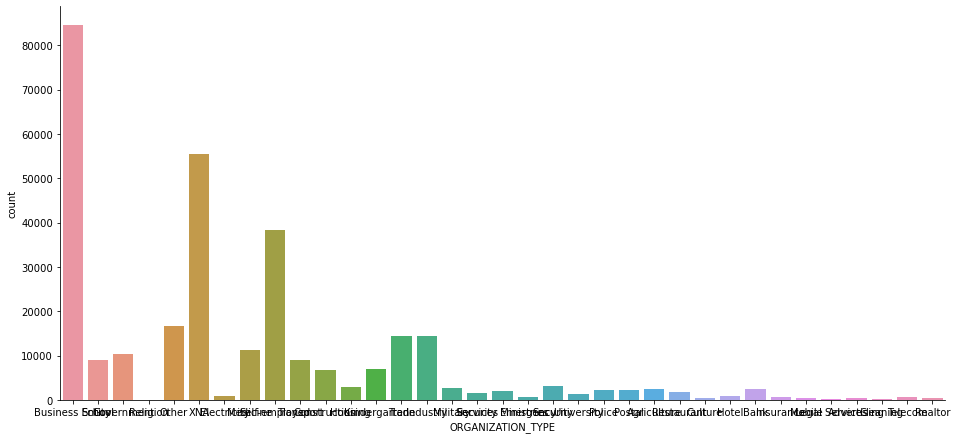

In [19]:
sns.catplot(x='ORGANIZATION_TYPE', kind="count", data=train,height=6, aspect=2.2)

## Données manquantes

AxesSubplot(0.125,0.125;0.775x0.755)


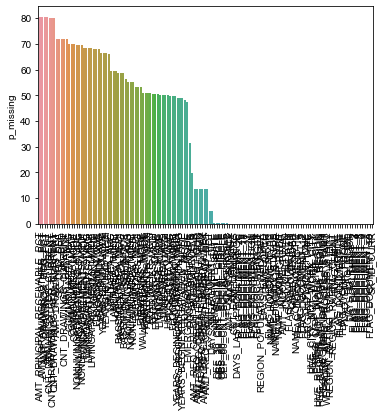

In [20]:
# Ajouter dans une variable un dataframe comprenant le % de valeur manquante par colonne
Nb_missing = pd.DataFrame(train.isna().sum()/train.shape[0]*100)
Nb_missing.columns = ["p_missing"]
Nb_missing.sort_values(ascending = False, by = 'p_missing', inplace=True)

# Représentation graphique
fig1 = sns.barplot(x = Nb_missing.index, y = "p_missing" , data = Nb_missing)
sns.set(rc={'figure.figsize':(4,8)})
plt.xticks(rotation=90)
print(fig1)

In [21]:
train = train[train.columns[train.isnull().mean() < 0.5]]

## Analyse TARGET

In [22]:
train.TARGET.value_counts(normalize= True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

<AxesSubplot:title={'center':'target'}, ylabel='Frequency'>

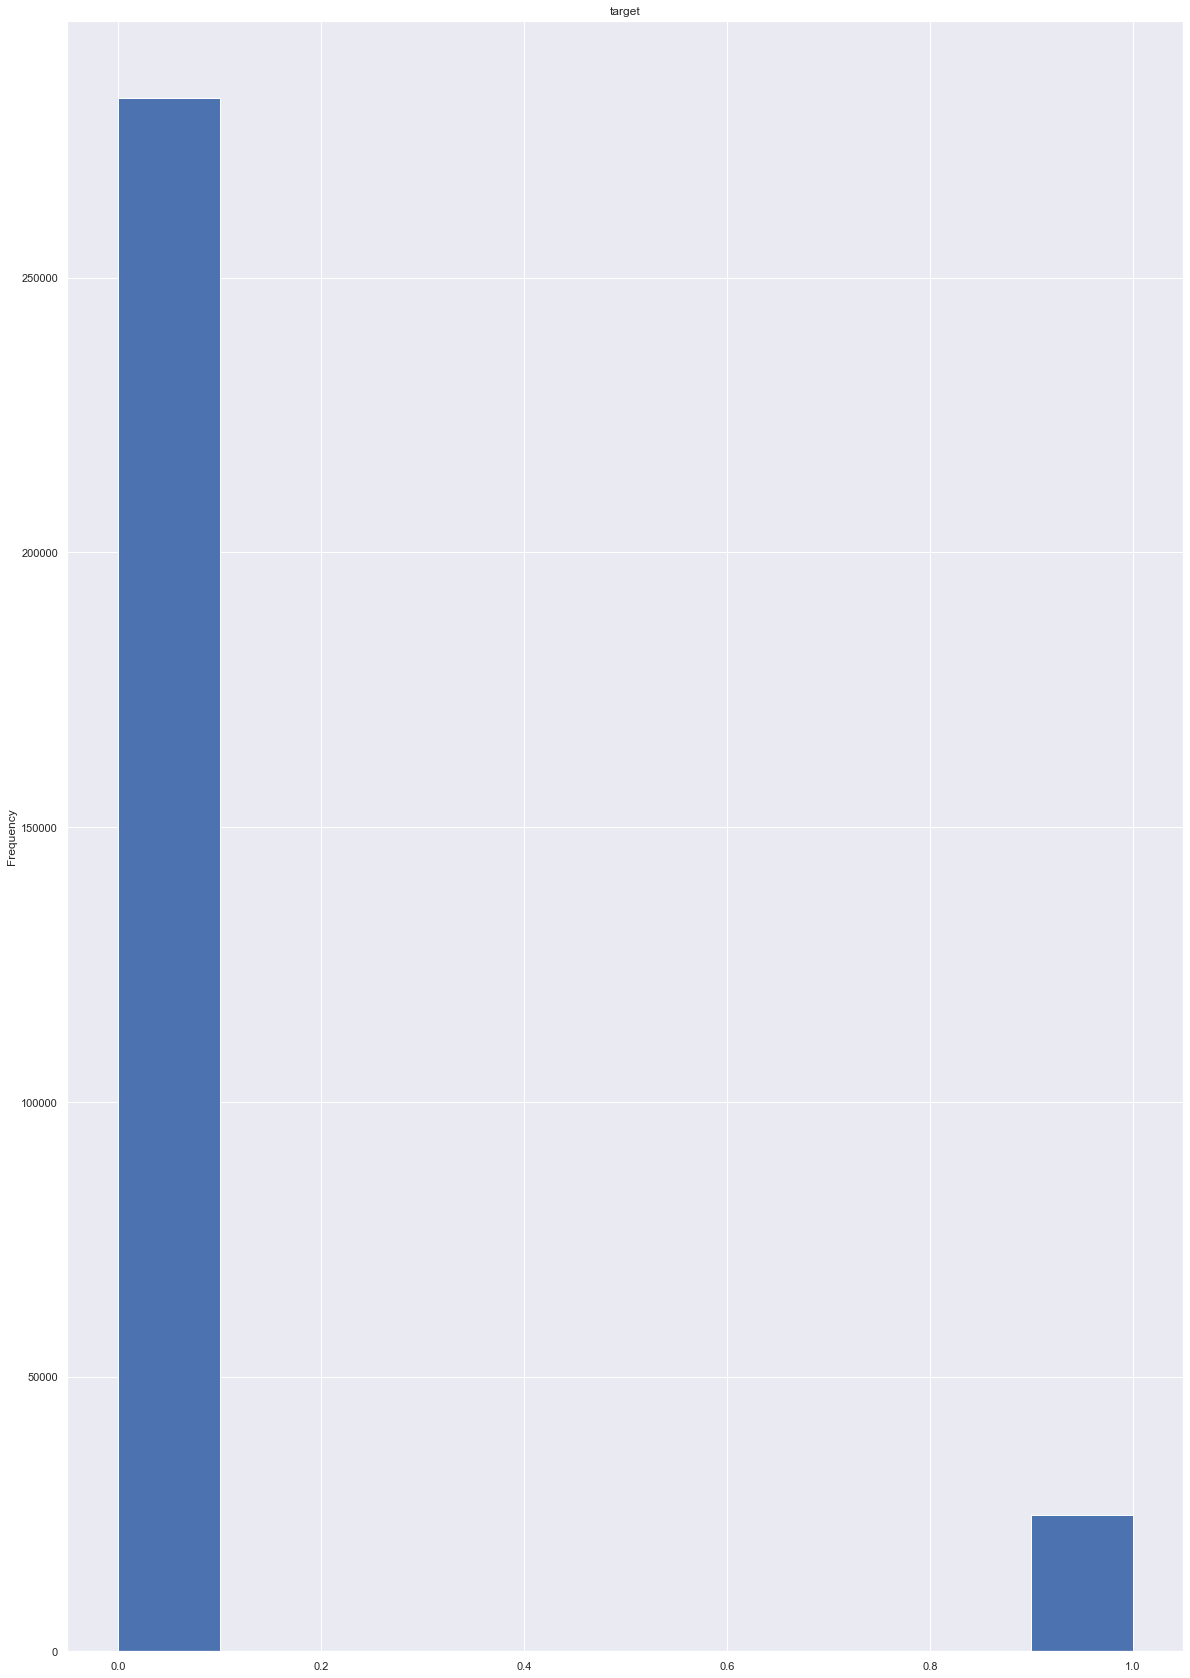

In [23]:
train['TARGET'].plot.hist(title = 'target')

## Analyse des corrélations

<AxesSubplot:>

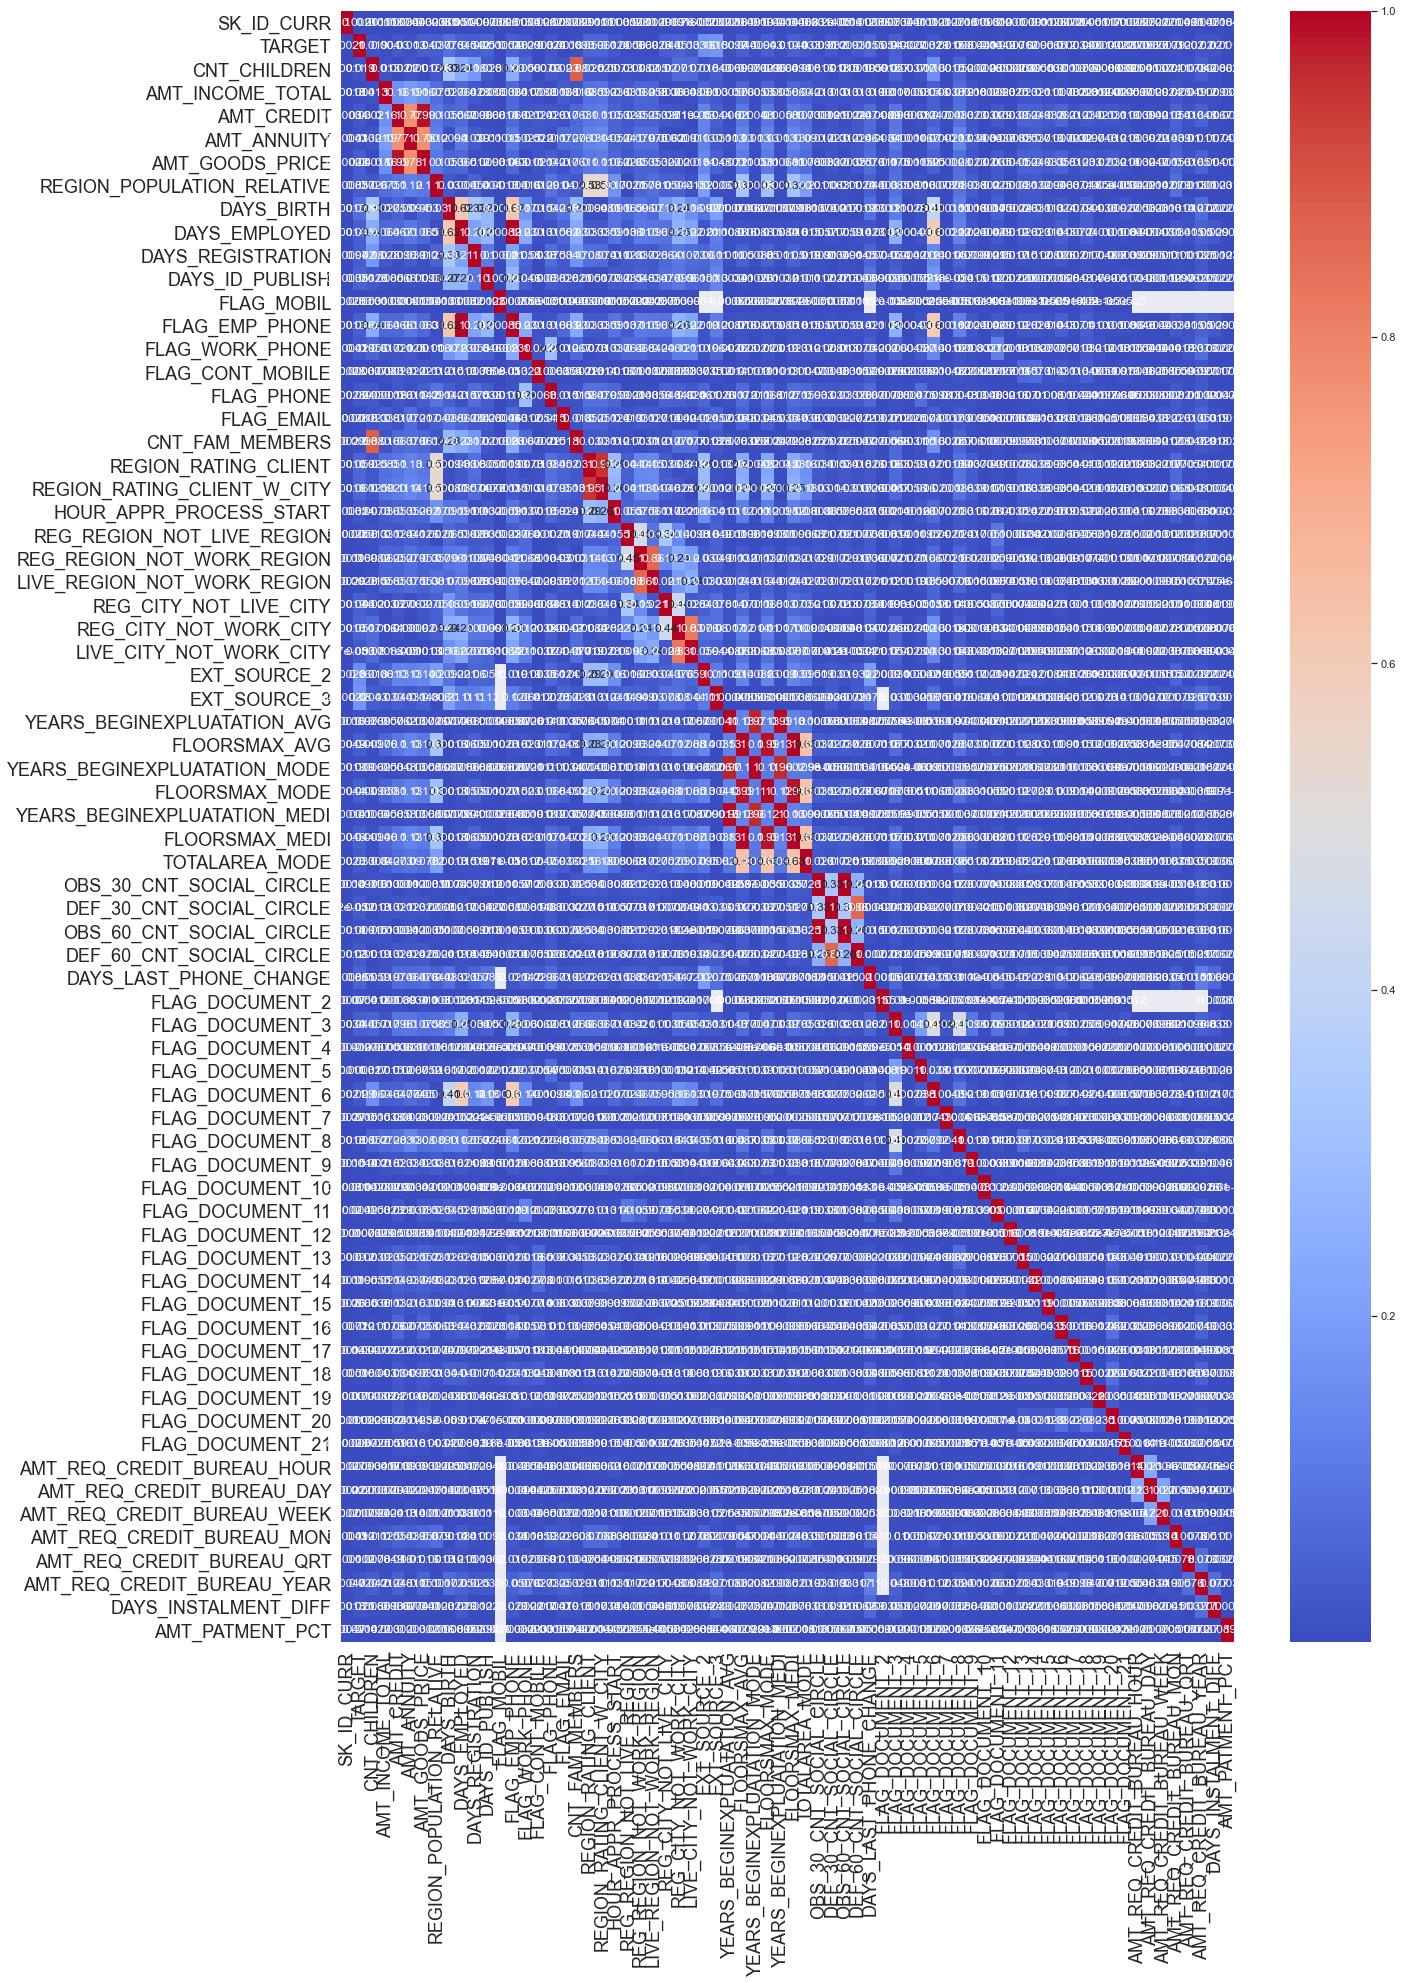

In [24]:
mat_corr = train.corr()
ax = sns.heatmap(abs(mat_corr) , annot = True , cmap = 'coolwarm')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax

In [25]:
correlations = train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(8))
print('\nMost Negative Correlations:\n', correlations.head(8))

Most Positive Correlations:
 FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
Name: TARGET, dtype: float64


array([[<AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'REG_CITY_NOT_WORK_CITY'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>],
       [<AxesSubplot:title={'center':'DAYS_LAST_PHONE_CHANGE'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT_W_CITY'}>],
       [<AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'TARGET'}>, <AxesSubplot:>]],
      dtype=object)

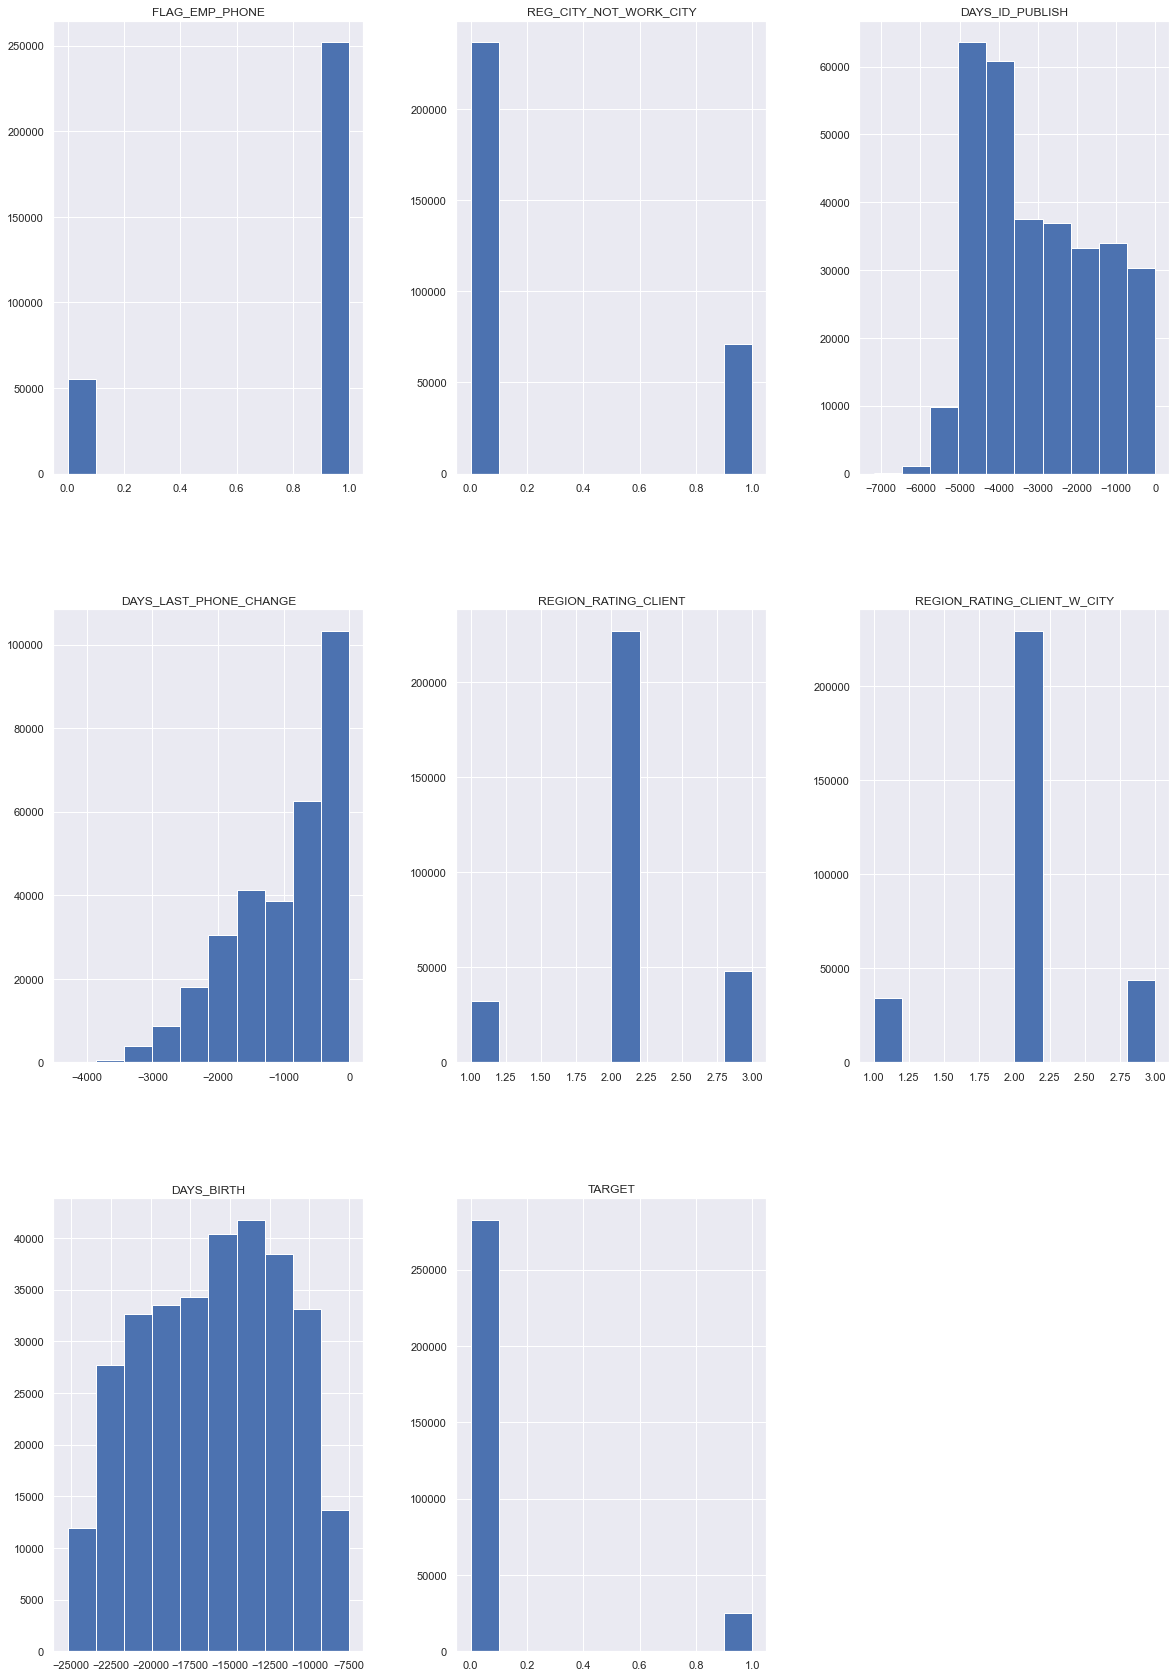

In [26]:
pos_corr = correlations.tail(8)
df_pos = train[pos_corr.index]
df_pos.hist()

array([[<AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'REG_CITY_NOT_WORK_CITY'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>],
       [<AxesSubplot:title={'center':'DAYS_LAST_PHONE_CHANGE'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT_W_CITY'}>],
       [<AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'TARGET'}>, <AxesSubplot:>]],
      dtype=object)

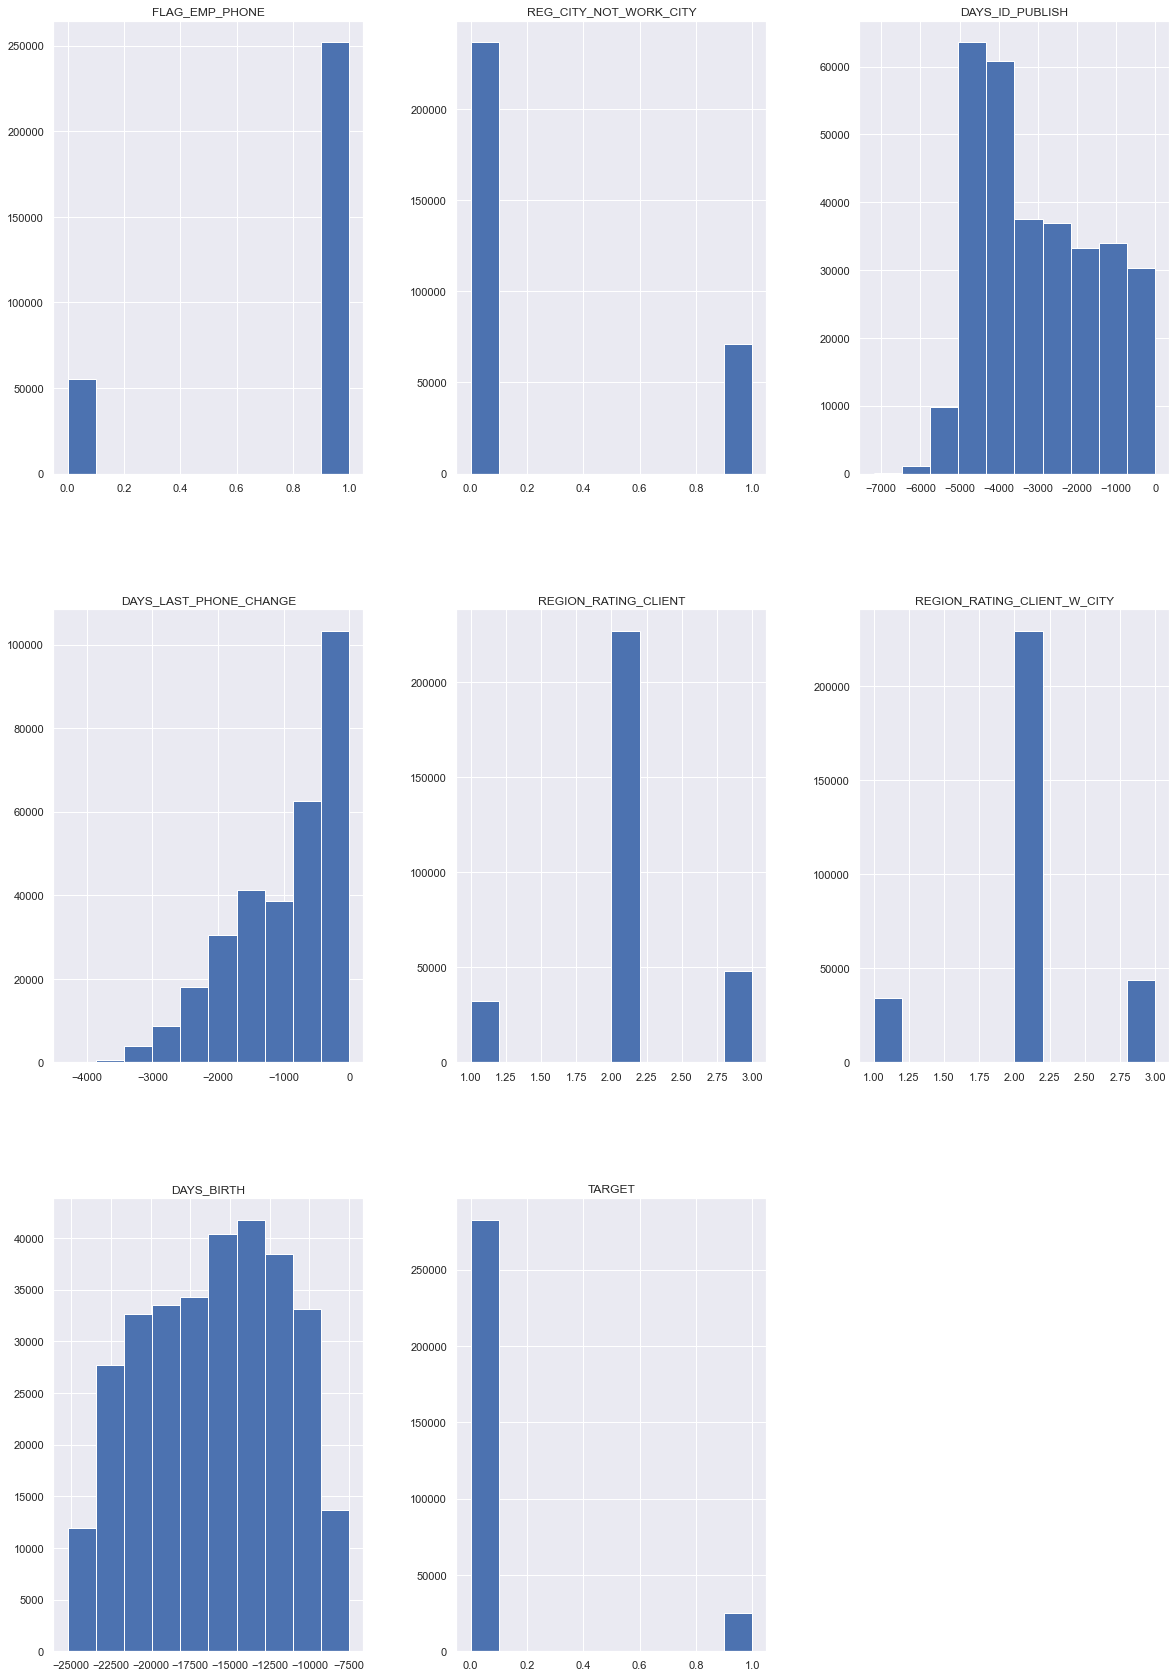

In [27]:
neg_corr = correlations.tail(8)
df_pos = train[neg_corr.index]
df_pos.hist()

# Preprocessing

## Split des données

In [28]:
y_columns = ['TARGET']
X = train.drop(y_columns, axis=1)
print(X.shape)
y = train[y_columns]
print(y.shape)

(307511, 82)
(307511, 1)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Création pipelines

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [31]:
categorical_pipeline = Pipeline(steps=[("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(sparse=False)),])

In [32]:
numeric_pipeline = Pipeline(steps=[("impute", SimpleImputer(strategy="median")), 
           ("scale", StandardScaler())])

In [33]:
cat_cols = X_train.select_dtypes(exclude="number").columns
num_cols = X_train.select_dtypes(include="number").columns

In [34]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(transformers=[("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),])

In [35]:
X_train_pro = full_processor.fit_transform(X_train)

In [36]:
X_test_pro = full_processor.transform(X_test)

## Resampling

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
print(X_train_pro.shape)
print(y_train.shape)

(215257, 172)
(215257, 1)


In [39]:
y_train_imb = np.ravel(y_train)

In [40]:
smt = SMOTE()
X_train_imp , y_train_imp = smt.fit_resample(X_train_pro,y_train)

In [41]:
print(X_train_imp.shape)
print(y_train_imp.shape)

(395882, 172)
(395882, 1)


In [42]:
y_train_imp = np.ravel(y_train_imp)

## Récupérer les noms des features

In [43]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [44]:
names = get_feature_names(full_processor)

C:\Users\PAUL~1.BON\AppData\Local\Temp/ipykernel_16396/1809191144.py:30: UserWarning: Transformer impute (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\PAUL~1.BON\AppData\Local\Temp/ipykernel_16396/1809191144.py:30: UserWarning: Transformer scale (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\paul.bonte\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Modélisation

## Baseline

In [45]:
from sklearn import dummy 
from sklearn import metrics

In [46]:
my_dummy = dummy.DummyClassifier(strategy = 'most_frequent')

In [47]:
my_dummy.fit(X = X_train_imp, y = y_train_imp)

DummyClassifier(strategy='most_frequent')

In [48]:
y_prob_dummy = (my_dummy.predict_proba(X_test_pro)[:,1]).astype('float16')

In [49]:
fpr_dummy, tpr_dummy, th_dummy = metrics.roc_curve(y_test, y_prob_dummy)
roc_auc_dummy = metrics.auc(fpr_dummy, tpr_dummy)
print(roc_auc_dummy)

0.5


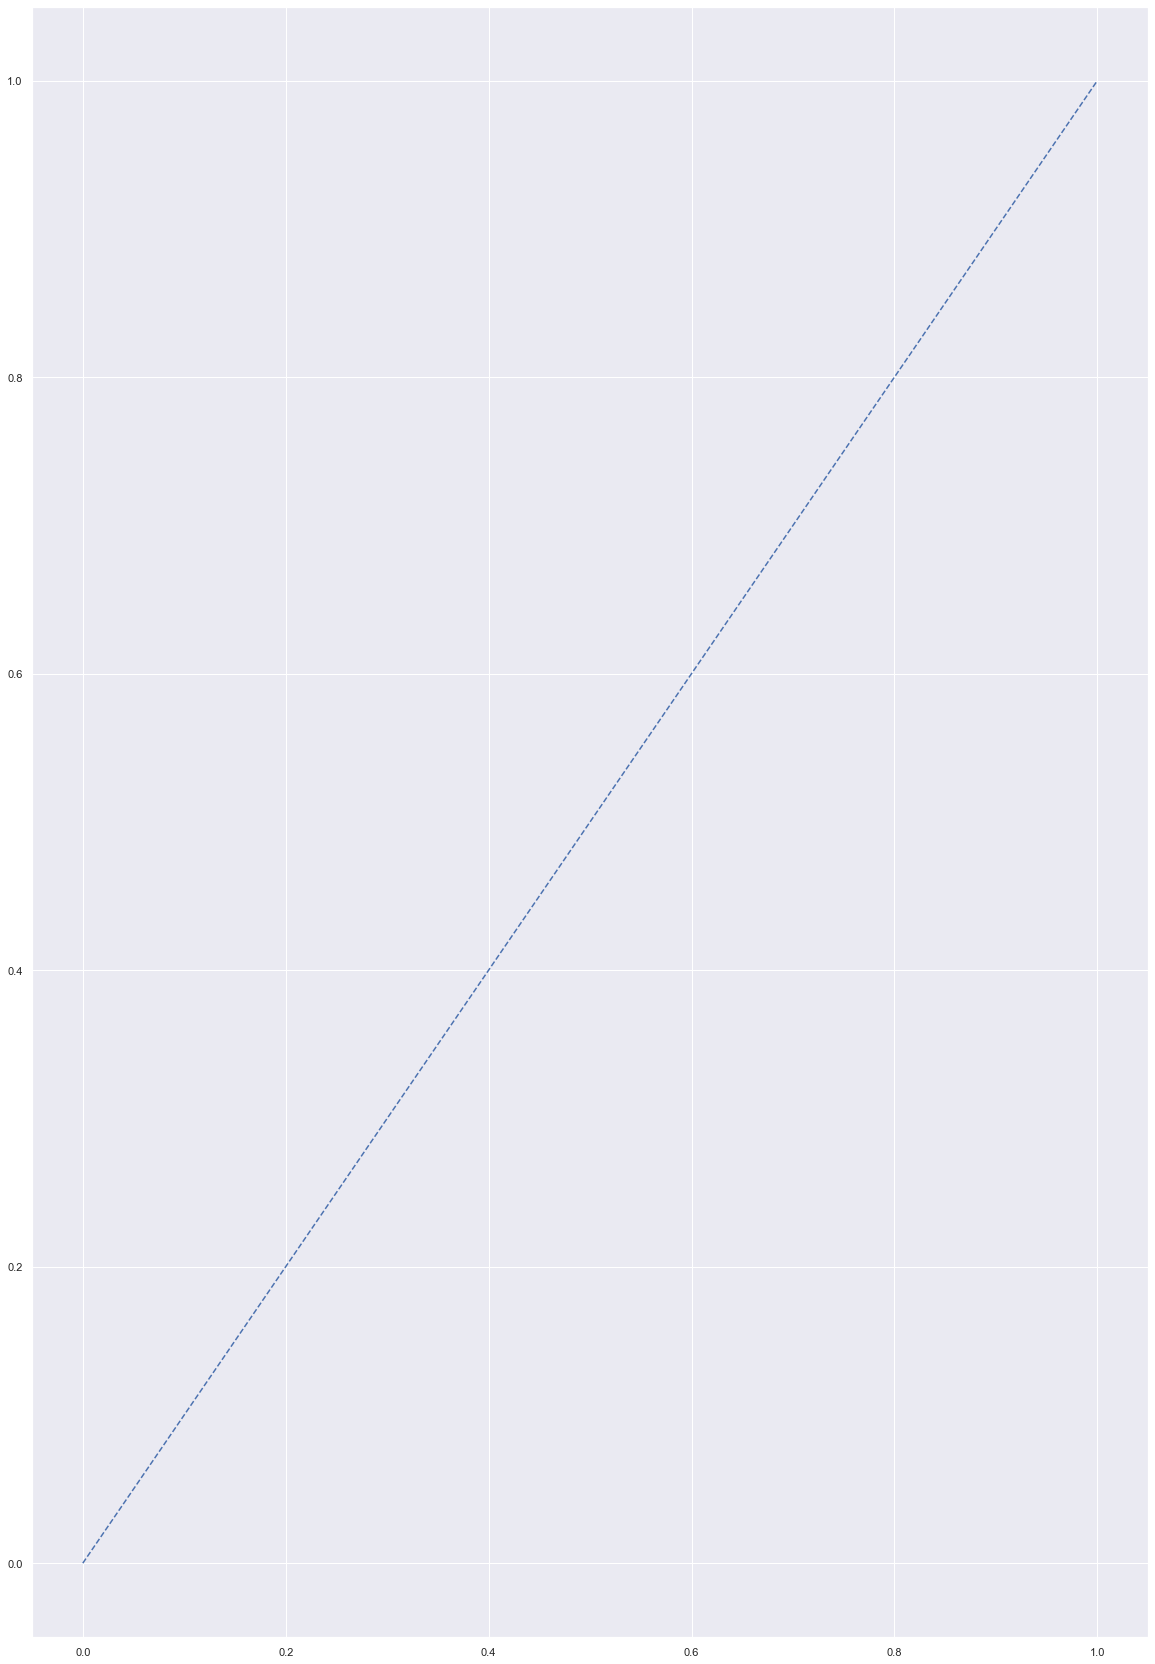

In [50]:
sns.set(rc={'figure.figsize':(4,8)})
plt.plot(fpr_dummy, tpr_dummy ,linestyle='--', label = "Dummy AUC %0.2f" % roc_auc_dummy)

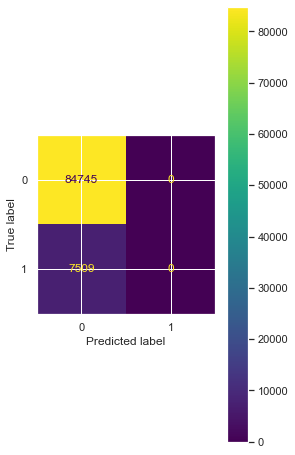

In [51]:
cm = metrics.confusion_matrix(y_true= y_test, y_pred = (y_prob_dummy >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

## Régression Logistique

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, roc_auc_score, roc_curve, confusion_matrix, recall_score
from datetime import datetime

In [53]:
log_reg = LogisticRegression(solver = 'liblinear', max_iter = 3000)

### Imbalanced

In [54]:
log_reg.fit(X_train_pro, y_train_imb)

LogisticRegression(max_iter=3000, solver='liblinear')

In [55]:
y_prob_log = (log_reg.predict_proba(X_test_pro)[:,1]).astype('float16')

In [56]:
y_pred_log = log_reg.predict(X_test_pro)

<AxesSubplot:ylabel='Count'>

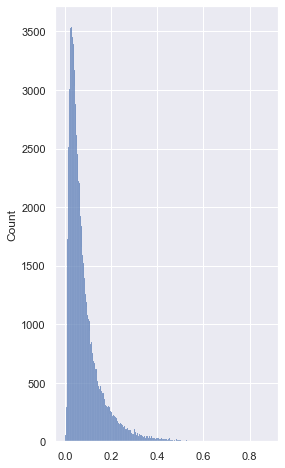

In [57]:
sns.histplot(y_prob_log)

In [58]:
fpr_log, tpr_log, th_log = metrics.roc_curve(y_test, y_pred_log)
roc_auc_log = metrics.auc(fpr_log, tpr_log)
print('ROC_AUC:', roc_auc_log)
accuracy_score_log = accuracy_score(y_test, y_pred_log)
print('Accuracy_score:', accuracy_score_log)
recall_log = recall_score(y_test, y_pred_log)
print('Recall:' , recall_log)
f1_log = f1_score(y_test, y_pred_log)
print('f1_score:' , f1_log)

ROC_AUC: 0.5053286303254982
Accuracy_score: 0.9185834760552388
Recall: 0.011719270209082434
f1_score: 0.022895798100689473


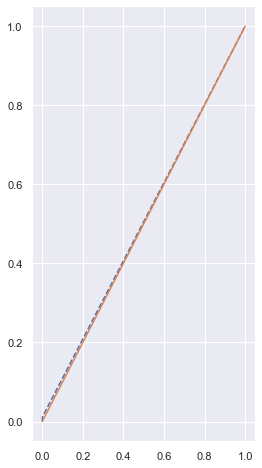

In [59]:
plt.plot(fpr_log, tpr_log ,linestyle='--', label = "Log_grid AUC %0.2f" % roc_auc_log)
plt.plot(fpr_dummy, tpr_dummy ,linestyle='-', label = "Dummy AUC %0.2f" % roc_auc_dummy)

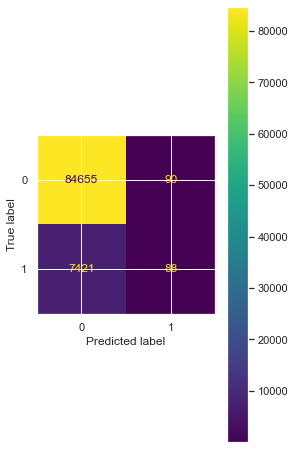

In [60]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred = (y_prob_log >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

### Balanced

In [61]:
start_time = datetime.now()
log_reg.fit(X_train_imp, y_train_imp)
end_time = datetime.now()
log_time = end_time - start_time

In [62]:
y_prob_log = (log_reg.predict_proba(X_test_pro)[:,1]).astype('float16')

In [63]:
y_pred_log = log_reg.predict(X_test_pro)

<AxesSubplot:ylabel='Count'>

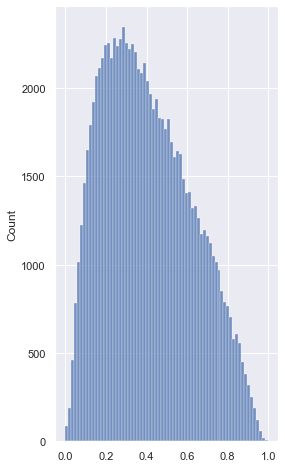

In [64]:
sns.histplot(y_prob_log)

In [65]:
fpr_log, tpr_log, th_log = metrics.roc_curve(y_test, y_pred_log)
roc_auc_log = metrics.auc(fpr_log, tpr_log)
print('ROC_AUC:', roc_auc_log)
accuracy_score_log = accuracy_score(y_test, y_pred_log)
print('Accuracy_score:', accuracy_score_log)
recall_log = recall_score(y_test, y_pred_log)
print('Recall:' , recall_log)
f1_log = f1_score(y_test, y_pred_log)
print('f1_score:' , f1_log)

ROC_AUC: 0.6738540156516489
Accuracy_score: 0.6896828321807185
Recall: 0.6549473964575843
f1_score: 0.2557196339434276


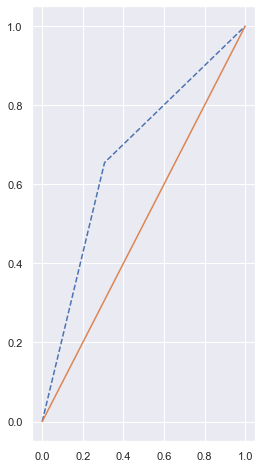

In [66]:
plt.plot(fpr_log, tpr_log ,linestyle='--', label = "Log_grid AUC %0.2f" % roc_auc_log)
plt.plot(fpr_dummy, tpr_dummy ,linestyle='-', label = "Dummy AUC %0.2f" % roc_auc_dummy)

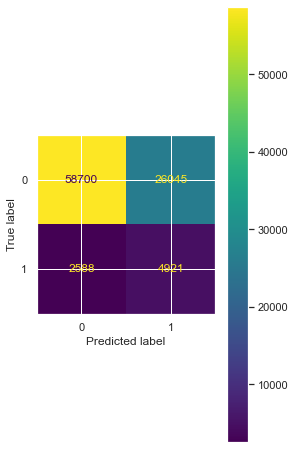

In [67]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred = (y_prob_log >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = RandomForestClassifier()
start_time = datetime.now()
rf.fit(X_train_imp, y_train_imp)
end_time = datetime.now()
rf_time = end_time - start_time

In [70]:
y_prob_rf = (rf.predict_proba(X_test_pro)[:,1]).astype('float16')

In [71]:
y_pred_rf = rf.predict(X_test_pro)

<AxesSubplot:ylabel='Count'>

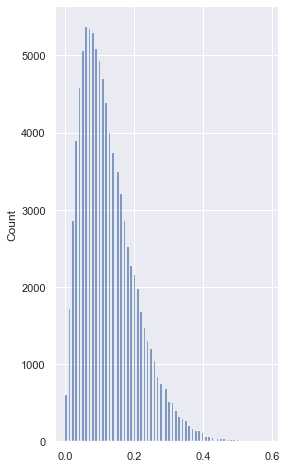

In [72]:
sns.histplot(y_prob_rf)

In [73]:
fpr_rf, tpr_rf, th_rf = metrics.roc_curve(y_test, y_pred_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
print('ROC_auc' , roc_auc_rf)
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy_score:', accuracy_score_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print('Recall:' , recall_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print('f1_score:' , f1_rf)

ROC_auc 0.5005655667228079
Accuracy_score: 0.9185292778632905
Recall: 0.0013317352510320948
f1_score: 0.0026539278131634822


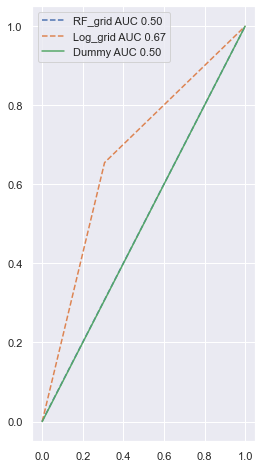

In [74]:
plt.plot(fpr_rf, tpr_rf ,linestyle='--', label = "RF_grid AUC %0.2f" % roc_auc_rf)
plt.plot(fpr_log, tpr_log ,linestyle='--', label = "Log_grid AUC %0.2f" % roc_auc_log)
plt.plot(fpr_dummy, tpr_dummy ,linestyle='-', label = "Dummy AUC %0.2f" % roc_auc_dummy)
plt.legend()

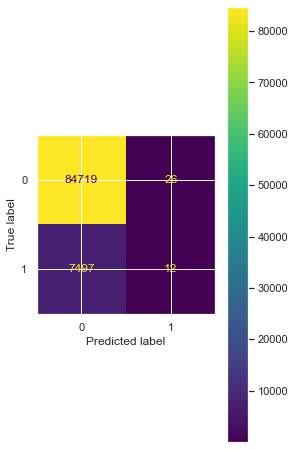

In [75]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred = (y_prob_rf >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

### Feature importance global

In [76]:
importance = rf.feature_importances_
fi_rf = pd.concat((pd.DataFrame(names, columns = ['Variables']), 
                      pd.DataFrame(importance, columns = ['Importance'])), axis = 1).sort_values(by='Importance', ascending = False)

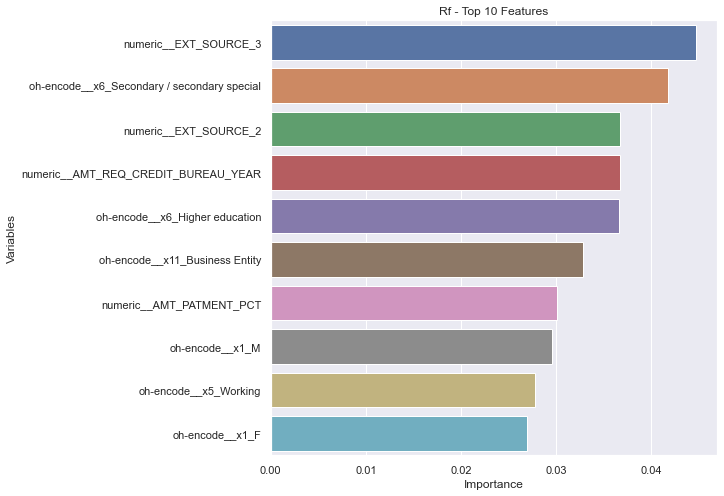

In [77]:
plt.figure(figsize=(8,8))
plt.title('Rf - Top 10 Features')
sns.barplot(y = fi_rf['Variables'].head(10),
            x = fi_rf['Importance'].head(10))
plt.show()

### Feature importance locale

In [78]:
import lime
from lime import lime_tabular

In [79]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_imp),
    feature_names= names,
    class_names=['0', '1'],
    mode='classification')

In [80]:
exp = explainer.explain_instance(
    data_row=X_train_imp[7], 
    predict_fn=rf.predict_proba
)

exp.show_in_notebook(show_table=True)

## GBT

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gbt = GradientBoostingClassifier()

In [83]:
start_time = datetime.now()
gbt.fit(X_train_imp, y_train_imp)
end_time = datetime.now()
gbt_time = end_time - start_time

In [84]:
y_prob_gbt = (gbt.predict_proba(X_test_pro)[:,1]).astype('float16')

In [85]:
y_pred_gbt = gbt.predict(X_test_pro)

<AxesSubplot:ylabel='Count'>

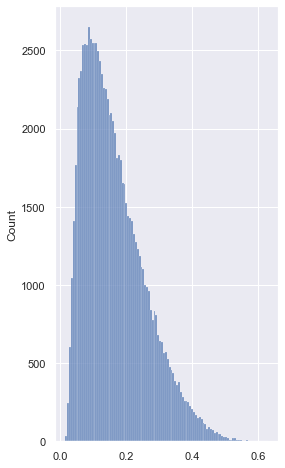

In [86]:
sns.histplot(y_prob_gbt)

In [87]:
fpr_gbt, tpr_gbt, th_gbt = metrics.roc_curve(y_test, y_pred_gbt)
roc_auc_gbt = metrics.auc(fpr_gbt, tpr_gbt)
print('ROC_auc' , roc_auc_gbt)
accuracy_score_gbt = accuracy_score(y_test, y_pred_gbt)
print('Accuracy_score:', accuracy_score_gbt)
recall_gbt = recall_score(y_test, y_pred_gbt)
print('Recall:' , recall_gbt)
f1_gbt = f1_score(y_test, y_pred_gbt)
print('f1_score:' , f1_gbt)

ROC_auc 0.5041182684933684
Accuracy_score: 0.9183666832874455
Recall: 0.009322146757224663
f1_score: 0.018250554034676052


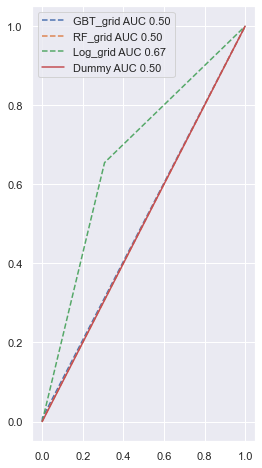

In [88]:
plt.plot(fpr_gbt, tpr_gbt ,linestyle='--', label = "GBT_grid AUC %0.2f" % roc_auc_gbt)
plt.plot(fpr_rf, tpr_rf ,linestyle='--', label = "RF_grid AUC %0.2f" % roc_auc_rf)
plt.plot(fpr_log, tpr_log ,linestyle='--', label = "Log_grid AUC %0.2f" % roc_auc_log)
plt.plot(fpr_dummy, tpr_dummy ,linestyle='-', label = "Dummy AUC %0.2f" % roc_auc_dummy)
plt.legend()

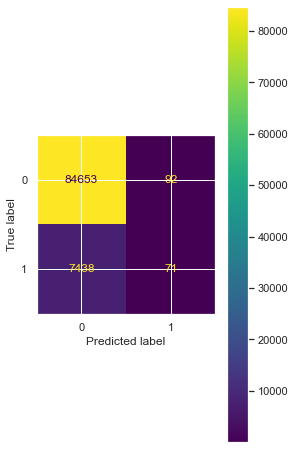

In [89]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred = (y_prob_gbt >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

### Feature importance global

In [90]:
importance = gbt.feature_importances_
fi_gbt = pd.concat((pd.DataFrame(names, columns = ['Variables']), 
                      pd.DataFrame(importance, columns = ['Importance'])), axis = 1).sort_values(by='Importance', ascending = False)

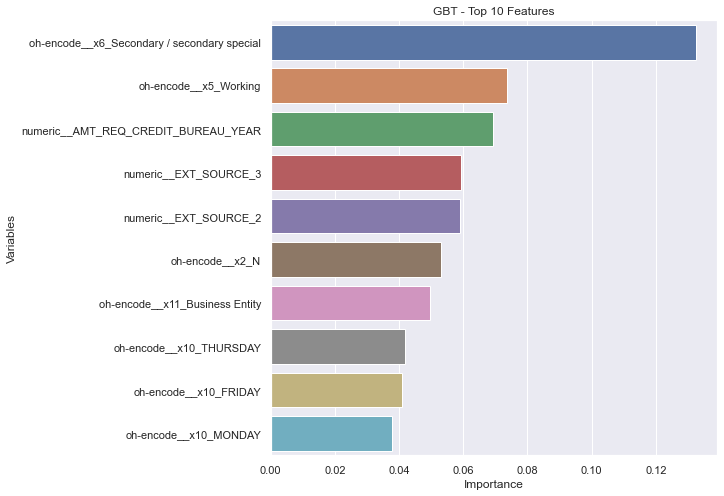

In [91]:
plt.figure(figsize=(8,8))
plt.title('GBT - Top 10 Features')
sns.barplot(y = fi_gbt['Variables'].head(10),
            x = fi_gbt['Importance'].head(10))
plt.show()

### Feature importance locale

In [92]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_imp),
    feature_names=names,
    class_names=['0', '1'],
    mode='classification')

In [93]:
exp = explainer.explain_instance(
    data_row=X_train_imp[7], 
    predict_fn=gbt.predict_proba
)

exp.show_in_notebook(show_table=True)

# Xgboost

In [94]:
import xgboost as xgb

In [95]:
xgb = xgb.XGBClassifier()

In [96]:
start_time = datetime.now()
xgb.fit(X_train_imp, y_train_imp)
end_time = datetime.now()
xgb_time = end_time - start_time

C:\Users\paul.bonte\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:04:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [97]:
y_prob_xgb = (xgb.predict_proba(X_test_pro)[:,1]).astype('float16')

In [98]:
y_pred_xgb = xgb.predict(X_test_pro)

<AxesSubplot:ylabel='Count'>

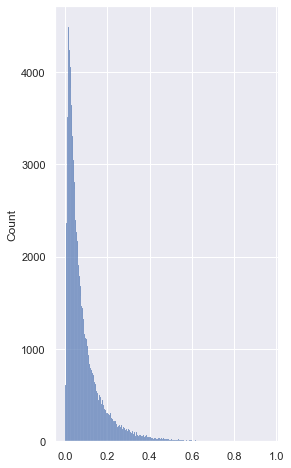

In [99]:
sns.histplot(y_prob_xgb)

In [100]:
fpr_xgb, tpr_xgb, th_xgb = metrics.roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)
print('ROC_auc' , roc_auc_xgb)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
print('Accuracy_score:', accuracy_score_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
print('Recall:' , recall_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print('f1_score:' , f1_gbt)

ROC_auc 0.5146187554068598
Accuracy_score: 0.9182582869035489
Recall: 0.03249434012518311
f1_score: 0.018250554034676052


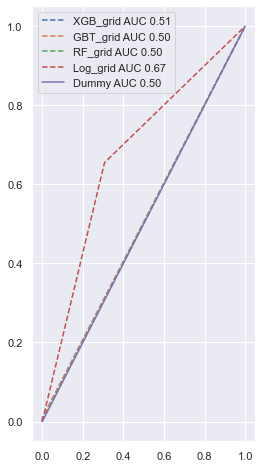

In [101]:
plt.plot(fpr_gbt, tpr_gbt ,linestyle='--', label = "XGB_grid AUC %0.2f" % roc_auc_xgb)
plt.plot(fpr_gbt, tpr_gbt ,linestyle='--', label = "GBT_grid AUC %0.2f" % roc_auc_gbt)
plt.plot(fpr_rf, tpr_rf ,linestyle='--', label = "RF_grid AUC %0.2f" % roc_auc_rf)
plt.plot(fpr_log, tpr_log ,linestyle='--', label = "Log_grid AUC %0.2f" % roc_auc_log)
plt.plot(fpr_dummy, tpr_dummy ,linestyle='-', label = "Dummy AUC %0.2f" % roc_auc_dummy)
plt.legend()

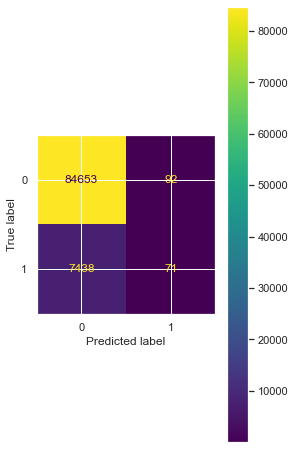

In [102]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred = (y_prob_gbt >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

## Feature importance global

In [103]:
importance = xgb.feature_importances_
fi_xgb = pd.concat((pd.DataFrame(names, columns = ['Variables']), 
                      pd.DataFrame(importance, columns = ['Importance'])), axis = 1).sort_values(by='Importance', ascending = False)

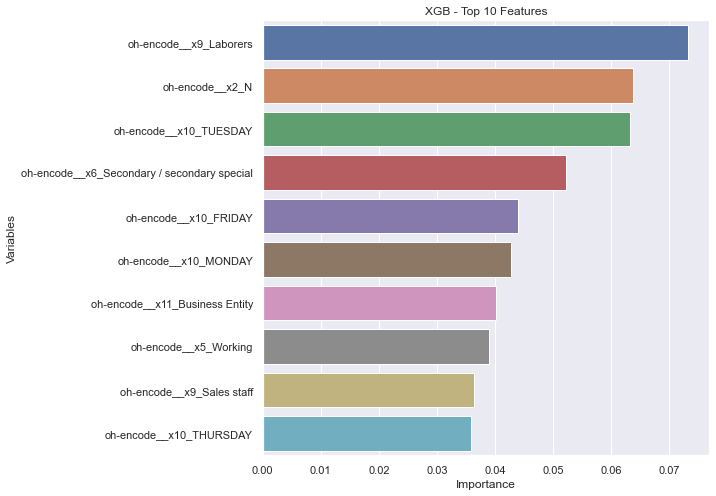

In [104]:
plt.figure(figsize=(8,8))
plt.title('XGB - Top 10 Features')
sns.barplot(y = fi_xgb['Variables'].head(10),
            x = fi_xgb['Importance'].head(10))
plt.show()

## Feature importance locale

In [105]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_imp),
    feature_names=names,
    class_names=['0', '1'],
    mode='classification')

In [106]:
exp = explainer.explain_instance(
    data_row=X_train_imp[7], 
    predict_fn=xgb.predict_proba
)

exp.show_in_notebook(show_table=True)

# Comparaison des modèles

In [107]:
df_comparaison = pd.DataFrame({'Roc_auc' : [roc_auc_log,roc_auc_rf,roc_auc_gbt,roc_auc_xgb],
                               'Accuracy_score' :[accuracy_score_log,accuracy_score_gbt,accuracy_score_gbt,accuracy_score_xgb],
                               'Recall_score' : [recall_log,recall_rf,recall_gbt,recall_xgb],
                              'F1_score' :[f1_log,f1_rf,f1_gbt,f1_xgb],
                              'Duration' : [log_time.seconds ,rf_time.seconds,gbt_time.seconds,xgb_time.seconds ]}, 
                              index = ['log','RF','GBT', 'XGB'])

In [108]:
df_comparaison

Roc_auc  Accuracy_score  Recall_score  F1_score  Duration
log  0.673854        0.689683      0.654947  0.255720       172
RF   0.500566        0.918367      0.001332  0.002654       180
GBT  0.504118        0.918367      0.009322  0.018251       815
XGB  0.514619        0.918258      0.032494  0.060780       106

array([<AxesSubplot:title={'center':'Roc_auc'}>,
       <AxesSubplot:title={'center':'Accuracy_score'}>,
       <AxesSubplot:title={'center':'Recall_score'}>,
       <AxesSubplot:title={'center':'F1_score'}>,
       <AxesSubplot:title={'center':'Duration'}>], dtype=object)

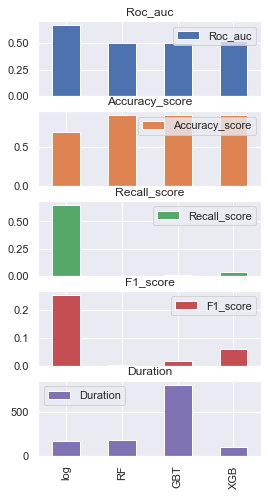

In [109]:
df_comparaison.plot.bar(subplots=True)

# Modèle retenu

## Feature importance global

## Feature importance locale